# Comandos para instalar o PySUS diretamente do GitHub.

Logo depois de instalar o PySUS, vá em Ambiente de execução e depois clique em Reiniciar Sessão. Só então, execute os scripts seguintes.

In [ ]:
#(fork, mais atualizado)
!pip install git+https://github.com/AlertaDengue/PySUS.git --upgrade

  Cloning https://github.com/AlertaDengue/PySUS.git to /tmp/pip-req-build-mss9qmjq
  Running command git clone --filter=blob:none --quiet https://github.com/AlertaDengue/PySUS.git /tmp/pip-req-build-mss9qmjq
  Resolved https://github.com/AlertaDengue/PySUS.git to commit 54f7800db4da5171d55e3446d638d64beeb8b149
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.6/462.6 k

# Agora que o PySUS está instalado, vamos digitar nosso primeiro script em Python em busca de dados nos sistemas do DataSUS

Antes, certifique-se de ter clicado em Ambiente de execução e depois em Reiniciar Sessão, se ainda não o fez.

In [ ]:
from pysus.online_data.SIM import download
import pandas as pd
import matplotlib.pyplot as plt

# Baixar os dados de óbito do Paraná (UF = 41) em 2022
df = download(year=2022, uf='PR')  # PR = Paraná

# Vamos visualizar as primeiras linhas para entender a estrutura
df.head()


TypeError: download() got an unexpected keyword argument 'year'

In [ ]:
from pysus.online_data.SIH import download as download_sih
from pysus.online_data.CNES import download as download_cnes
from pysus.online_data.SIM import download as download_sim
from pysus.online_data.SINASC import download as download_sinasc

In [ ]:
# Internações no Paraná (UF = PR), ano 2023, mês 01, tipo RD (resumo de internação hospitalar)

# Baixa o arquivo
parquet_set = download_sih("PR", 2023, 1, "RD")

# Converte para DataFrame
df_sih = parquet_set.to_dataframe()

# Visualiza as primeiras linhas
df_sih.head()


RDPR2301.parquet: 100%|██████████| 262k/262k [00:14<00:00, 18.4kB/s]


,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,410000,2023,01,03,76416866003408,4123107307913,1,83252000,411820,19510523,...,,0,0,0,0,0,0,0,0,0
1,410000,2023,01,07,,4122111788135,1,83280000,410960,20220925,...,,0,0,0,0,0,0,0,0,0
2,410000,2023,01,07,,4123107299510,1,83280000,410960,20211230,...,,0,0,0,0,0,0,0,0,0
3,410000,2023,01,07,,4123107299597,1,83280000,410960,20220313,...,,0,0,0,0,0,0,0,0,0
4,410000,2023,01,07,,4123107299608,1,87111560,412625,20170508,...,,0,0,0,0,0,0,0,0,0


# Exemplo de Código criado pelo GPT usando o código acima como modelo para encontrar o número de médicos de Foz do Iguaçu via CNES e PySUS
Observação, comentamos (usando #) a linha de !pip pois ela é desnecessária nesse ambiente já que o !pip foi realizado anteriormente se você está seguindo os comandos um a um e na sequência. Originalmente, o GPT não havia comentado (#) essa linha de código.

O prompt utilizado no GPT foi: "Considere o código anexo AulaUnioestePySUS.txt. Baseado nos exemplos contidos no arquivo, escreva um código em Python para o Google Colab usando a biblioteca PySUS para acessar o CNES e encontrar o número de médicos em Foz do Iguaçu."

Se você não possui o arquivo AulaUnioestePySUS.txt, substitua o texto "anexo AulaUnioestePySUS.txt" por:

!pip install git+https://github.com/AlertaDengue/PySUS.git --upgrade

from pysus.online_data.SIH import download as download_sih
from pysus.online_data.CNES import download as download_cnes
from pysus.online_data.SIM import download as download_sim
from pysus.online_data.SINASC import download as download_sinasc

# Baixa o arquivo
parquet_set = download_sih("PR", 2023, 1, "RD")

# Converte para DataFrame
df_sih = parquet_set.to_dataframe()

# Visualiza as primeiras linhas
df_sih.head()

# Exemplo: baixar dados da tabela ST (Estabelecimentos de Saúde) de 2023

# Baixar dados da tabela ST (Estabelecimentos de Saúde) para janeiro de 2023
parquet_set = download_cnes("ST", states=["PR"], years=[2023], months=[1])

# Converter para DataFrame
df_cnes = parquet_set.to_dataframe()

# Visualizar as primeiras linhas
df_cnes.head()

# Parâmetros
grupo = "CID10"         # Declaração de óbito completa
estados = ["PR"]     # Sigla do estado como string em uma lista
anos = [2022]        # Ano em lista

# Baixando os dados
parquet_set = download_sim(grupo, states=estados, years=anos)

# Convertendo para DataFrame
df_sim = parquet_set.to_dataframe()

# Visualizando as primeiras linhas
df_sim.head()


# Parâmetros
grupo = "DN"          # Dados completos de nascidos vivos
estados = ["PR"]      # Estado: Paraná
anos = [2022]         # Ano

# Baixando os dados
parquet_set = download_sinasc(grupo, states=estados, years=anos)

# Convertendo para DataFrame
df_sinasc = parquet_set.to_dataframe()

# Visualizando as primeiras linhas
df_sinasc.head()

In [ ]:
# Instalar a biblioteca PySUS
#!pip install git+https://github.com/AlertaDengue/PySUS.git --upgrade

# Importar bibliotecas necessárias
from pysus.online_data.CNES import download as download_cnes
import pandas as pd

# Parâmetros
estado = "PR"
ano = 2023
mes = 1

# Baixar dados da tabela PF (Profissionais) do CNES
parquet_set = download_cnes("PF", states=[estado], years=[ano], months=[mes])

# Converter para DataFrame
df_pf = parquet_set.to_dataframe()

# Filtrar profissionais do município de Foz do Iguaçu (código IBGE: 410830)
df_foz = df_pf[df_pf["CO_MUNICIP"] == "410830"]

# Filtrar apenas médicos (CBO inicia com 2231 - Médicos gerais e especialistas)
df_medicos = df_foz[df_foz["CO_CBO"].str.startswith("2231")]

# Contar número total de médicos
numero_medicos = df_medicos.shape[0]

# Exibir o resultado
print(f"Número de médicos em Foz do Iguaçu (jan/2023): {numero_medicos}")


PFPR2301.parquet: 100%|██████████| 371k/371k [00:20<00:00, 18.0kB/s]


KeyError: 'CO_MUNICIP'

O código anterior vai rodar e devolver um erro: PFPR2301.parquet: 100%|██████████| 371k/371k [00:20<00:00, 18.0kB/s]
---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py in get_loc(self, key)
   3804         try:
-> 3805             return self._engine.get_loc(casted_key)
   3806         except KeyError as err:

index.pyx in pandas._libs.index.IndexEngine.get_loc()

index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'CO_MUNICIP'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
2 frames
/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py in get_loc(self, key)
   3810             ):
   3811                 raise InvalidIndexError(key)
-> 3812             raise KeyError(key) from err
   3813         except TypeError:
   3814             # If we have a listlike key, _check_indexing_error will raise

KeyError: 'CO_MUNICIP'

# Você deve apenas copiar essa mensagem de erro e colar no GPT para verificar se ele é capaz de resolver o problema.

A resposta do GPT foi: Esse erro indica que a coluna "CO_MUNICIP" não existe no DataFrame df_pf. Isso pode ocorrer porque os nomes das colunas mudam dependendo da tabela CNES baixada e do ano/mês selecionado.

Vamos inspecionar o DataFrame para ver os nomes reais das colunas. Execute o código abaixo para listar todas as colunas disponíveis:

Então, ele pede para que se execute a seguinte linha de código:

In [ ]:
# Verificar o nome correto das colunas
print(df_pf.columns)

Index(['CNES', 'CODUFMUN', 'REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM',
       'TPGESTAO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'ESFERA_A',
       'ATIVIDAD', 'RETENCAO', 'NATUREZA', 'CLIENTEL', 'TP_UNID', 'TURNO_AT',
       'NIV_HIER', 'TERCEIRO', 'CPF_PROF', 'CPFUNICO', 'CBO', 'CBOUNICO',
       'NOMEPROF', 'CNS_PROF', 'CONSELHO', 'REGISTRO', 'VINCULAC', 'VINCUL_C',
       'VINCUL_A', 'VINCUL_N', 'PROF_SUS', 'PROFNSUS', 'HORAOUTR', 'HORAHOSP',
       'HORA_AMB', 'COMPETEN', 'UFMUNRES', 'NAT_JUR'],
      dtype='object')


O resultado será: Index(['CNES', 'CODUFMUN', 'REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM',
       'TPGESTAO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'ESFERA_A',
       'ATIVIDAD', 'RETENCAO', 'NATUREZA', 'CLIENTEL', 'TP_UNID', 'TURNO_AT',
       'NIV_HIER', 'TERCEIRO', 'CPF_PROF', 'CPFUNICO', 'CBO', 'CBOUNICO',
       'NOMEPROF', 'CNS_PROF', 'CONSELHO', 'REGISTRO', 'VINCULAC', 'VINCUL_C',
       'VINCUL_A', 'VINCUL_N', 'PROF_SUS', 'PROFNSUS', 'HORAOUTR', 'HORAHOSP',
       'HORA_AMB', 'COMPETEN', 'UFMUNRES', 'NAT_JUR'],
      dtype='object')

Cole esse resultado e aguarde o GPT sugerir a correção.

Essa foi a resposta do GPT:
Perfeito! Com base nas colunas disponíveis:

A coluna que representa o município é: 'CODUFMUN' (código IBGE do município do estabelecimento).

A coluna com o código da ocupação (CBO) é: 'CBO'.

O código IBGE de Foz do Iguaçu é 410830.

✅ Aqui está o código corrigido para contar os médicos atuando em Foz do Iguaçu:

# Filtrar para Foz do Iguaçu (código IBGE: 410830)
df_foz = df_pf[df_pf["CODUFMUN"] == 410830]

# Filtrar médicos: CBO começa com '2231' (médicos em geral)
df_medicos = df_foz[df_foz["CBO"].str.startswith("2231")]

# Contar o número total de médicos
numero_medicos = df_medicos.shape[0]

# Exibir resultado
print(f"Número de médicos em Foz do Iguaçu (jan/2023): {numero_medicos}")

Como podem ver, o GPT foi preguiçoso e só devolveu o código parcialmente corrigido. Apenas peça em seguida para que ele escreva o código completo novamente com as correções.

In [ ]:
# 1. Instalar a biblioteca PySUS
#Mais uma vez comentamos a linha abaixo pois não faz sentido perder tempo e processamento para executá-la repetidas vezes já que no google colab a biblioteca já foi carregada e está na memória.
#!pip install git+https://github.com/AlertaDengue/PySUS.git --upgrade

# 2. Importar bibliotecas
from pysus.online_data.CNES import download as download_cnes
import pandas as pd

# 3. Baixar os dados da tabela PF (Profissionais) para o Paraná em janeiro de 2023
estado = "PR"
ano = 2023
mes = 1
parquet_set = download_cnes("PF", states=[estado], years=[ano], months=[mes])

# 4. Converter para DataFrame
df_pf = parquet_set.to_dataframe()

# 5. Filtrar profissionais em Foz do Iguaçu (código IBGE: 410830)
df_foz = df_pf[df_pf["CODUFMUN"] == 410830]

# 6. Filtrar médicos (CBO começa com '2231' = médicos e especialistas)
df_medicos = df_foz[df_foz["CBO"].str.startswith("2231")]

# 7. Contar o número de médicos
numero_medicos = df_medicos.shape[0]

# 8. Exibir resultado
print(f"Número de médicos em Foz do Iguaçu (jan/2023): {numero_medicos}")


16602855it [00:00, 15578841417.88it/s]


Número de médicos em Foz do Iguaçu (jan/2023): 0


Perceba que o resultado foi zero. Perguntamos ao GPT o porquê dessa forma: Tem alguma coisa errada, porque o resultado devolvido foi: 16602855it [00:00, 15578841417.88it/s]
Número de médicos em Foz do Iguaçu (jan/2023): 0

A resposta dele foi: Ótima observação — esse retorno 16602855it [...] indica que o DataFrame foi processado corretamente, mas o filtro não encontrou nenhum médico com:

CODUFMUN == 410830, e

CBO iniciando com "2231".

Isso provavelmente está acontecendo porque a coluna CBO está em formato numérico (inteiro), não como string — e estamos tentando usar .str.startswith(), o que só funciona com strings.

✅ Vamos corrigir o problema convertendo a coluna CBO para string com zero à esquerda:

In [ ]:
# 1. Instalar a biblioteca PySUS
#comentamos mais uma vez o !pip
#!pip install git+https://github.com/AlertaDengue/PySUS.git --upgrade

# 2. Importar bibliotecas
from pysus.online_data.CNES import download as download_cnes
import pandas as pd

# 3. Baixar os dados da tabela PF (Profissionais) para o Paraná em janeiro de 2023
estado = "PR"
ano = 2023
mes = 1
parquet_set = download_cnes("PF", states=[estado], years=[ano], months=[mes])

# 4. Converter para DataFrame
df_pf = parquet_set.to_dataframe()

# 5. Corrigir: converter CBO para string com zero à esquerda (caso esteja como número)
df_pf["CBO"] = df_pf["CBO"].astype(str).str.zfill(6)

# 6. Filtrar profissionais em Foz do Iguaçu (código IBGE: 410830)
df_foz = df_pf[df_pf["CODUFMUN"] == 410830]

# 7. Filtrar médicos (CBO começa com '2231' = médicos e especialistas)
df_medicos = df_foz[df_foz["CBO"].str.startswith("2231")]

# 8. Contar o número de médicos
numero_medicos = df_medicos.shape[0]

# 9. Exibir resultado
print(f"Número de médicos em Foz do Iguaçu (jan/2023): {numero_medicos}")


16602855it [00:00, 17241253067.08it/s]


Número de médicos em Foz do Iguaçu (jan/2023): 0


Como a resposta ainda foi zero, e o problema parece estar na forma como o GPT está lendo a coluna CBO, pedimos para ele tentar entender o que está gravado em registros aleatórios com essa pergunta:

Ainda não funcionou. Já que o problema parece ser com o formato com que os dados estão armazenados na coluna, você não poderia fazer um código para a gente ler um aleatoriamente e entender como os dados estão gravados?

Essa foi a resposta do GPT: Excelente ideia! Vamos inspecionar diretamente alguns registros para entender como estão armazenados os dados da coluna CBO (ocupação) e CODUFMUN (município). Assim, poderemos diagnosticar corretamente o motivo do filtro retornar zero médicos.

Aqui vai um código para:

Listar alguns valores únicos de CODUFMUN para garantir que 410830 (Foz do Iguaçu) está presente;

Visualizar uma amostra aleatória com os campos CBO e CODUFMUN.

O código seguinte foi sugerido para se executar no google colab na sequência:

# Mostrar os primeiros valores únicos da coluna CODUFMUN
print("Códigos de municípios encontrados:")
print(df_pf["CODUFMUN"].unique()[:10])

# Mostrar os primeiros valores únicos da coluna CBO
print("\nAlguns códigos de CBO encontrados:")
print(df_pf["CBO"].unique()[:10])

# Mostrar uma amostra aleatória de 10 registros com as colunas relevantes
print("\nAmostra aleatória de registros (CBO e CODUFMUN):")
print(df_pf[["CBO", "CODUFMUN"]].sample(10))


In [ ]:
# Mostrar os primeiros valores únicos da coluna CODUFMUN
print("Códigos de municípios encontrados:")
print(df_pf["CODUFMUN"].unique()[:10])

# Mostrar os primeiros valores únicos da coluna CBO
print("\nAlguns códigos de CBO encontrados:")
print(df_pf["CBO"].unique()[:10])

# Mostrar uma amostra aleatória de 10 registros com as colunas relevantes
print("\nAmostra aleatória de registros (CBO e CODUFMUN):")
print(df_pf[["CBO", "CODUFMUN"]].sample(10))


Códigos de municípios encontrados:
<StringArray>
['410420', '410425', '410430', '410440', '410442', '410445', '410450',
 '410460', '410465', '410470']
Length: 10, dtype: string

Alguns códigos de CBO encontrados:
['223505' '322205' '251605' '225250' '131210' '225125' '225320' '225151'
 '225270' '225225']

Amostra aleatória de registros (CBO e CODUFMUN):
           CBO CODUFMUN
229073  322205   412290
278817  225250   411840
270661  322230   411740
202968  225125   410690
199110  223305   410690
142945  513220   410880
127006  223293   410760
94042   225225   411070
4911    223505   410430
3486    322205   410430


O resultado da execução do código anterior foi: Códigos de municípios encontrados:
<StringArray>
['410420', '410425', '410430', '410440', '410442', '410445', '410450',
 '410460', '410465', '410470']
Length: 10, dtype: string

Alguns códigos de CBO encontrados:
['223505' '322205' '251605' '225250' '131210' '225125' '225320' '225151'
 '225270' '225225']

Amostra aleatória de registros (CBO e CODUFMUN):
           CBO CODUFMUN
229073  322205   412290
278817  225250   411840
270661  322230   411740
202968  225125   410690
199110  223305   410690
142945  513220   410880
127006  223293   410760
94042   225225   411070
4911    223505   410430
3486    322205   410430

Colamos esse resultado no GPT para que ele possa corrigir o código original e fazemos uma nova tentativa.

O GPT resposdeu: ✅ Análise dos dados:
Coluna CBO:

Está armazenada como string com 6 dígitos (ex: '223505').

Ou seja, já está no formato certo — não precisa de zfill nem conversão.

Coluna CODUFMUN:

Também é do tipo string (como StringArray).

Então, devemos comparar com "410830" (entre aspas), e não com inteiro.

Há registros com CBOs como '225250', '225125', '225225', que também são médicos especialistas.

✅ Novo filtro mais abrangente:
Na CBO, os médicos geralmente estão em dois grupos principais:

'2231XX': médicos clínicos gerais.

'2251XX' até '225999': médicos especialistas.

Vamos incluir ambos os grupos.

Então, ele reescreveu o código completo que está abaixo:

In [ ]:
# 1. Instalar a biblioteca PySUS
#comentamos
#!pip install git+https://github.com/AlertaDengue/PySUS.git --upgrade

# 2. Importar bibliotecas
from pysus.online_data.CNES import download as download_cnes
import pandas as pd

# 3. Baixar os dados da tabela PF (Profissionais) para o Paraná em janeiro de 2023
estado = "PR"
ano = 2023
mes = 1
parquet_set = download_cnes("PF", states=[estado], years=[ano], months=[mes])

# 4. Converter para DataFrame
df_pf = parquet_set.to_dataframe()

# 5. Filtrar profissionais de Foz do Iguaçu (CODUFMUN como string)
df_foz = df_pf[df_pf["CODUFMUN"] == "410830"]

# 6. Filtrar médicos: CBO começa com '2231' ou '225' (médicos e especialistas)
df_medicos = df_foz[df_foz["CBO"].str.startswith(("2231", "225"))]

# 7. Contar médicos
numero_medicos = df_medicos.shape[0]

# 8. Mostrar resultado
print(f"Número de médicos em Foz do Iguaçu (jan/2023): {numero_medicos}")


16602855it [00:00, 14982233463.41it/s]


Número de médicos em Foz do Iguaçu (jan/2023): 2399


# Pronto!
Com paciência, obtivemos a resposta: 16602855it [00:00, 14982233463.41it/s]
Número de médicos em Foz do Iguaçu (jan/2023): 2399


O GPT sugeriu o seguinte: Se quiser ir além, posso gerar uma tabela com o número de médicos por especialidade (CBO) ou um gráfico com as 10 ocupações mais comuns em Foz. Deseja isso?

Para testar, dissemos sim e obtivemos a seguinte resposta do GPT:

Perfeito! Vamos complementar o código anterior para:

✅ Criar uma tabela com os 10 CBOs (ocupações médicas) mais comuns entre os médicos em Foz do Iguaçu, com descrição legível.
Incluirei também um gráfico de barras com essas ocupações — tudo pronto para rodar no Google Colab.

✅ Código completo com gráfico + tabela:

16602855it [00:00, 10591242758.62it/s]


Top 10 ocupações médicas em Foz do Iguaçu:
      CBO  Quantidade                  Descrição
0  225125         924       Médico Cardiologista
1  225151         131      Médico Dermatologista
2  225250         119    Médico Endocrinologista
3  225124         110  Especialidade não mapeada
4  225270         100      Médico Infectologista
5  225320          98        Médico Neurologista
6  2231F9          92  Especialidade não mapeada
7  225225          90       Médico Ginecologista
8  225142          81  Especialidade não mapeada
9  225120          60  Especialidade não mapeada


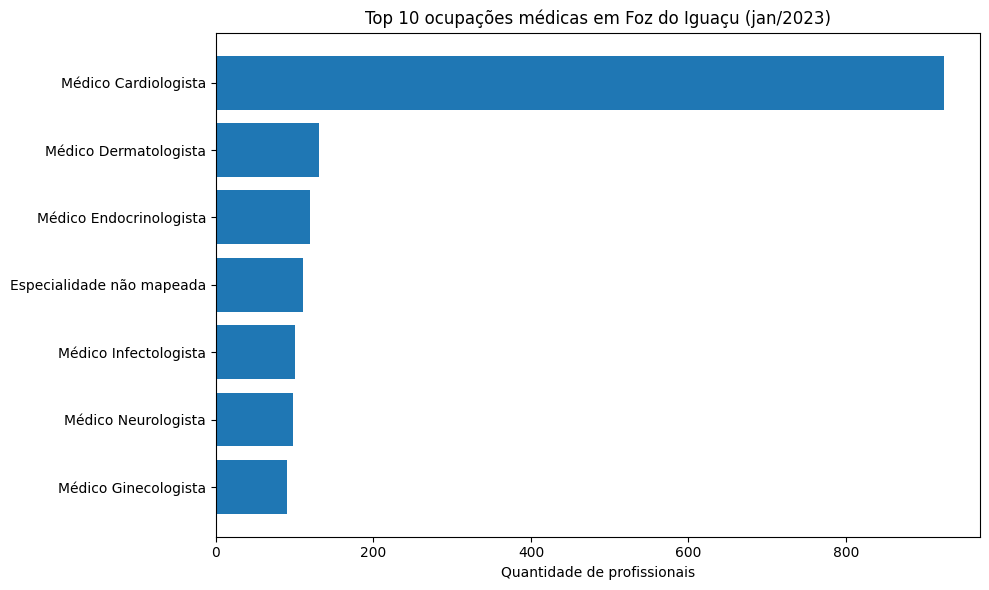

In [ ]:
# 1. Instalar dependências
#mais uma vez comentamos a linha do pip do PySUS, mas agora precisamos de uma outra biblioteca que ainda não havia sido importada, então a seguinte não está comentada (#)
#!pip install git+https://github.com/AlertaDengue/PySUS.git --upgrade
!pip install matplotlib

# 2. Importar bibliotecas
from pysus.online_data.CNES import download as download_cnes
import pandas as pd
import matplotlib.pyplot as plt

# 3. Baixar dados PF para o PR em janeiro de 2023
estado = "PR"
ano = 2023
mes = 1
parquet_set = download_cnes("PF", states=[estado], years=[ano], months=[mes])
df_pf = parquet_set.to_dataframe()

# 4. Filtrar para Foz do Iguaçu
df_foz = df_pf[df_pf["CODUFMUN"] == "410830"]

# 5. Filtrar médicos (CBOs começam com '2231' ou '225')
df_medicos = df_foz[df_foz["CBO"].str.startswith(("2231", "225"))]

# 6. Tabela de frequência por CBO
cbo_counts = df_medicos["CBO"].value_counts().head(10).reset_index()
cbo_counts.columns = ["CBO", "Quantidade"]

# 7. Criar dicionário de CBOs mais comuns (parcial, pode expandir se quiser)
descricao_cbo = {
    "223505": "Enfermeiro",
    "223293": "Médico Clínico",
    "223305": "Médico da Estratégia de Saúde da Família",
    "225125": "Médico Cardiologista",
    "225225": "Médico Ginecologista",
    "225320": "Médico Neurologista",
    "225270": "Médico Infectologista",
    "225250": "Médico Endocrinologista",
    "225151": "Médico Dermatologista",
    "225145": "Médico Cirurgião",
    "225350": "Médico Oftalmologista"
}

# 8. Mapear a descrição dos CBOs
cbo_counts["Descrição"] = cbo_counts["CBO"].map(descricao_cbo).fillna("Especialidade não mapeada")

# 9. Exibir tabela
print("Top 10 ocupações médicas em Foz do Iguaçu:")
print(cbo_counts)

# 10. Gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(cbo_counts["Descrição"], cbo_counts["Quantidade"])
plt.xlabel("Quantidade de profissionais")
plt.title("Top 10 ocupações médicas em Foz do Iguaçu (jan/2023)")
plt.gca().invert_yaxis()  # Coloca o maior no topo
plt.tight_layout()
plt.show()


# Pronto! Temos nosso primeiro gráfico de exemplo!

# Seja paciente e perseverante!

# Estude o básico de Python!

# Obrigado pela atenção! E boa sorte!

# Conheça nosso site: http://www.kraemeracademy.net

# Conheça nosso canal no Youtube: Kraemer Academy

# Curiosidade: Assista ao documentário "A Noiva de Preto" com Izabelle Ferrari, Alexandre Kraemer e Anelise Kraemer, que conta a história dos casamentos com vestidos de noiva pretos no século XIX no sul do Brasil.